#  About the analysis

Q: How much does it cost to cool a skyscraper in the summer?
A: A lot! And not just in dollars, but in environmental impact.

Thankfully, significant investments are being made to improve building efficiencies to reduce costs and emissions. The question is, are the improvements working? That’s where you come in. Under pay-for-performance financing, the building owner makes payments based on the difference between their real energy consumption and what they would have used without any retrofits. The latter values have to come from a model. Current methods of estimation are fragmented and do not scale well. Some assume a specific meter type or don’t work with different building types.

In this competition, you’ll develop accurate models of metered building energy usage in the following areas: chilled water, electric, hot water, and steam meters. The data comes from over 1,000 buildings over a three-year timeframe. With better estimates of these energy-saving investments, large scale investors and financial institutions will be more inclined to invest in this area to enable progress in building efficiencies.

# About the Host

Founded in 1894, ASHRAE serves to advance the arts and sciences of heating, ventilation, air conditioning refrigeration and their allied fields. ASHRAE members represent building system design and industrial process professionals around the world. With over 54,000 members serving in 132 countries, ASHRAE supports research, standards writing, publishing and continuing education - shaping tomorrow’s built environment today.

Banner photo by Federico Beccari on Unsplash

Assessing the value of energy efficiency improvements can be challenging as there's no way to truly know how much energy a building would have used without the improvements. The best we can do is to build counterfactual models. Once a building is overhauled the new (lower) energy consumption is compared against modeled values for the original building to calculate the savings from the retrofit. More accurate models could support better market incentives and enable lower cost financing. This competition challenges you to build these counterfactual models across four energy types based on historic usage rates and observed weather. The dataset includes three years of hourly meter readings from over one thousand buildings at several different sites around the world.

Buildings' operational energy is highly dependent on various building physical, operational, and functional characteristics, as well as meteorological and temporal properties

 Besides physics-based building energy modeling, machine learning techniques can provide faster and higher accuracy estimates, given buildings' historic energy consumption data. Looking beyond individual building levels, forecasting buildings’ energy performance helps city and community managers have a better understanding of their future energy needs, and plan for satisfying them more efficiently

# Objective

## develop accurate models of metered building energy usage in the following areas: chilled water, electric, hot water, and steam meters

# How to solve the problem 

1 Try to understand the data abit
    
2 Data preparation

3 Data visualization to flash out some domain knowledge

4 Data selection

5 Data transformation

6 Fit the algorithm

7 Imporove the model

8 Check out the accurany of the algorithms

9 Present the results

Files

### train.csv

building_id - Foreign key for the building metadata.

meter - The meter id code. Read as {0: electricity, 1: chilledwater, 2: steam, hotwater: 3}. Not every building has all meter types.

timestamp - When the measurement was taken

meter_reading - The target variable. Energy consumption in kWh (or equivalent).

Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. ####

### building_meta.csv

site_id - Foreign key for the weather files.

building_id - Foreign key for training.csv

primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type

definitions

square_feet - Gross floor area of the building

year_built - Year building was opened

floorcount - Number of floors of the building

### weather[train/test].csv
 
Weather data from a meteorological station as close as possible to the site

site_id

air_temperature - Degrees Celsius

cloud_coverage - Portion of the sky covered in clouds, in oktas

dew_temperature - Degrees Celsius

precip_depth_1_hr - Millimeters

sea_level_pressure - Millibar/hectopascals

wind_direction - Compass direction (0-360)

wind_speed - Meters per second

### test.csv

The submission files use row numbers for ID codes in order to save space on the file uploads. test.csv has no feature data; it exists so you can get your predictions into the correct order.

row_id - Row id for your submission file

building_id - Building id code

meter - The meter id code

timestamp - Timestamps for the test data period

 ### sample_submission.csv

A valid sample submission.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

###  Train data set 

In [2]:
df=pd.read_csv("train.csv")
df.tail(5)

,building_id,meter,timestamp,meter_reading
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575
20216099,1448,0,2016-12-31 23:00:00,2.850


In [3]:
#checking the rows and columns of the data
df.shape

(20216100, 4)

our training data has 20216100  rows and 4 columns

In [4]:
#checking out all the name of the columns
df.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype='object')

In [5]:
#checking the data types of the columns
df.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

ALL the above columns are in numelical from expect the timestamp which is in object data type

In [6]:
#getting the statistical info of the data
df.describe()

,building_id,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992780e+02,6.624412e-01,2.117121e+03
std,4.269133e+02,9.309921e-01,1.532356e+05
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.930000e+02,0.000000e+00,1.830000e+01
50%,8.950000e+02,0.000000e+00,7.877500e+01
75%,1.179000e+03,1.000000e+00,2.679840e+02
max,1.448000e+03,3.000000e+00,2.190470e+07


It shows that the maximum energy a building can consume is 2.190470e+07

Minimum 0.000000e+00

Average .117121e+03

In [7]:
#checking for null values in the data
df.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

Our data  has no null values which is good

In [8]:
#converting timestamp from object data type to datetime64
df['Timestamp'] = pd.to_datetime(df.timestamp)

In [9]:
#checking out the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 5 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
Timestamp        datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 771.2+ MB


Hence at this point our data is in right datatype

In [10]:
df.head(2)

,building_id,meter,timestamp,meter_reading,Timestamp
0,0,0,2016-01-01 00:00:00,0.0,2016-01-01
1,1,0,2016-01-01 00:00:00,0.0,2016-01-01


In [10]:
#dropping the timestamp
df.drop(['timestamp'],axis=1,inplace=True)

In [ ]:
#checking out for the duplicates in the data
df.duplicated()

Our data has no duplicate 

# Understanding the weather  dataset

####  Weather data from a meteorological station as close as possible to the site

In [11]:
df_weather=pd.read_csv("weather_train.csv")
df_weather.head(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [12]:
#rows and columns of the data 
df_weather.shape

(139773, 9)

The data  has 139773  rows and 9 columns

In [13]:
#columns names
df_weather.columns

Index(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

In [14]:
#data types
df_weather.dtypes

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

Correct data format except timestamp which as object data type

In [15]:
#stastical  summary of the data
df_weather.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


Maximum air_temperature around the bulding is 47.2 while the minimum is  -28.9 which could require lots enery 

electicity to cool the building  and increase the  temperature respecively

Maximum cloudcover is 9 while minimum is 0 

Maximum dew-temp is 26.1 while minimum is  -35

Maximum precipitation depth per hour  343 while minimum is -1

Maximum sea_level_ pressure is 1045 while minimum is 7.63

Maximum wind speed is 19 while minimum is 0 

And all of the above features  influence  the amount of energy consumption in the building



In [16]:
#checking for the null vaues in our df_weather dataset
df_weather.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

Quite a number of null values in the df_weather dataset

#### imputation of the null varaibles in df_weather dataset

From the above data we  assets that the missing values are as a results  of fail to record  the  features 

hence we can solve the issue with impututing the previous or next values

In [17]:
df_weather.fillna(method='bfill',inplace=True)

In [18]:
df_weather.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        3
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

The bfill method has worked for almost every feature expect  cloud coverage which we will use the ffill method

In [19]:
df_weather.fillna(method='ffill',inplace=True)


In [20]:
#checking out
df_weather.isnull().sum()

site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

At this point our df_weather dataset is clean meaning it has no  missing values

In [22]:
#checking for duplicates 
df_weather.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
139768    False
139769    False
139770    False
139771    False
139772    False
Length: 139773, dtype: bool

Awesome data with no duplicates so our data is okay  for further analysis

# building_meta_df data

In [21]:
df_meta=pd.read_csv("building_metadata.csv")
df_meta.tail(5)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN
1448,15,1448,Office,92271,2001.0,NaN


In [22]:
#number of rows and columns
df_meta.shape

(1449, 6)

14449 rows and 6 columns

In [23]:
#columns names
df_meta.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count'],
      dtype='object')

In [24]:
#data types 
df_meta.dtypes

site_id          int64
building_id      int64
primary_use     object
square_feet      int64
year_built     float64
floor_count    float64
dtype: object

All features have the the right datatype expect we have to change the datatype of building id which is object to int64 or float 

In [25]:
#stattical summary
df_meta.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


Maximum square feet of the buildings is  875000 and minimum  is 1449

Maximum floor count of the buildings is  is  26 and minimum is 1

These two factors have the  much greater effects on the amount of energy a building is likely to consume 
 
Most number of buildings were  opened in 2017 while in 1900 is when their was the least number of buliding opened
 
which according to my intution has  litle influence on the amount of energy a building will consume

In [26]:
#checking for null values
df_meta.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

Missing values are in  year_built of the building which i believe was a result of failure to include the value or 

human  error because every building  has a record of this so has the  floor count of the building.

In [27]:
#imputation of null values 
df_meta.fillna(method='ffill',inplace=True)

In [28]:
df_meta.fillna(method='bfill',inplace=True)

In [29]:
df_meta.isnull().sum()

site_id        0
building_id    0
primary_use    0
square_feet    0
year_built     0
floor_count    0
dtype: int64

In [30]:
info_build=df_meta
info_build

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,5.0
1,0,1,Education,2720,2004.0,5.0
2,0,2,Education,5376,1991.0,5.0
3,0,3,Education,23685,2002.0,5.0
4,0,4,Education,116607,1975.0,5.0
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,4.0
1445,15,1445,Education,4298,1914.0,4.0
1446,15,1446,Entertainment/public assembly,11265,1997.0,4.0
1447,15,1447,Lodging/residential,29775,2001.0,4.0


Our df_meta data is clean with no null values

In [32]:
#checking for duplicates 
info_build.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1444    False
1445    False
1446    False
1447    False
1448    False
Length: 1449, dtype: bool

No duplicates in our data

In [31]:
#checking for unique values in primary_use 
info_build['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [32]:
#conevrting this into  numerical varaible 
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
results=encoder.fit_transform(df_meta[['primary_use']])

In [33]:
results

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [4.],
       [6.]])

In [34]:
#converting an array into dataframe
primary=pd.DataFrame(results,columns=['primary_usage'])
primary

,primary_usage
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1444,1.0
1445,0.0
1446,1.0
1447,4.0


In [35]:
#joining the two dataframe
meta_data = pd.concat([info_build,primary],axis=1)
meta_data

,site_id,building_id,primary_use,square_feet,year_built,floor_count,primary_usage
0,0,0,Education,7432,2008.0,5.0,0.0
1,0,1,Education,2720,2004.0,5.0,0.0
2,0,2,Education,5376,1991.0,5.0,0.0
3,0,3,Education,23685,2002.0,5.0,0.0
4,0,4,Education,116607,1975.0,5.0,0.0
...,...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,4.0,1.0
1445,15,1445,Education,4298,1914.0,4.0,0.0
1446,15,1446,Entertainment/public assembly,11265,1997.0,4.0,1.0
1447,15,1447,Lodging/residential,29775,2001.0,4.0,4.0


In [36]:
df["meter_reading"].value_counts()

0.0000       1873976
20.0000        23363
2.9307         23181
36.6000        22154
8.7921         21787
              ...   
72.6357            1
2977.7000          1
55.4186            1
2977.4500          1
15.3563            1
Name: meter_reading, Length: 1688175, dtype: int64

It shows quite a number of an unrecoreded metre readings from the buildings

# Data visualization

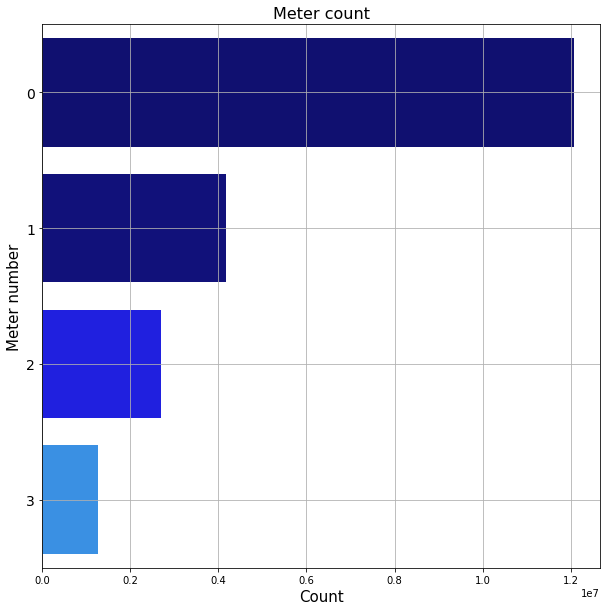

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = sns.countplot(y="meter", data=df, palette=['navy', 'darkblue', 'blue', 'dodgerblue']).set_title('Meter count', fontsize=16)
plt.yticks(fontsize=14)
plt.grid()
plt.xlabel("Count", fontsize=15)
plt.ylabel("Meter number", fontsize=15)
plt.show(plot)



0: electricity, 1: chilledwater, 2: steam, hotwater: 3}
From the above diagram most of the building  energy usage is electricity and the least energy use id  hotwater



Text(0.5, 1.0, 'meter reading')

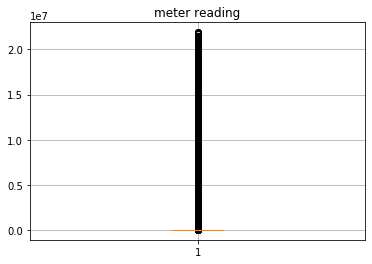

In [38]:
#nalysing using the boxplot
plt.boxplot(df['meter_reading'])
plt.grid()
plt.title("meter reading")

Almost all the meter readings are  are slightly below or above 1 or 1

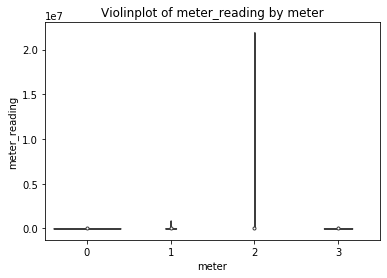

In [58]:
sns.violinplot(x='meter', y='meter_reading', data=df);
plt.title('Violinplot of meter_reading by meter');

In [39]:
df.query('meter_reading==0').shape

(1873976, 4)

In [44]:
df.shape

(20216100, 4)

In [40]:
(1873976/20216100)*100

9.269720668180312

This shows 9% of the data  of the energy consumption is zero in kwh  which is weird because under no situation the

energy consumption should be zero expect when the house is vacant .Others maybe some buildings have no  metre 

readings or failure to collect or record the data 

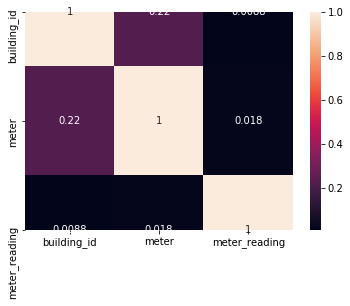

In [41]:
#checking out the correlation
sns.heatmap(df.corr(),annot=True)

metre readings  has low correlation with other  features 

## trend and seasonality in meter_readings

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
building_id = 400
building = df.query(f'building_id == {building_id} and meter==0')

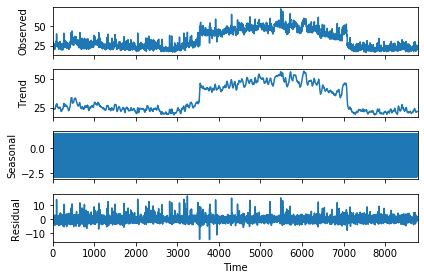

In [44]:
decomposition = seasonal_decompose(building['meter_reading'].values, freq=24)
decomposition.plot();

In [45]:
building_id = 1444
building = df.query(f'building_id == {building_id} and meter==0')

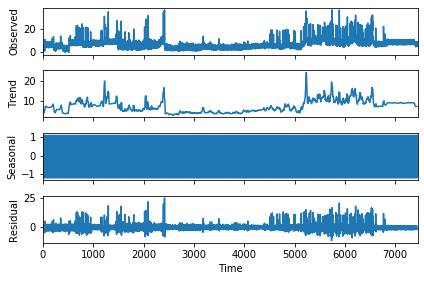

In [46]:
decomposition = seasonal_decompose(building['meter_reading'].values, freq=24)
decomposition.plot();

from  the above  seasonality is not that significant in many cases. 

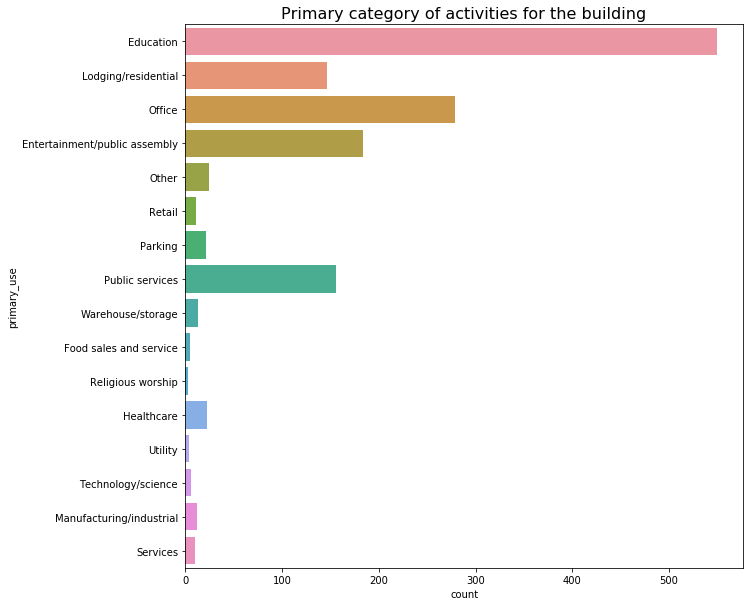

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
plot = sns.countplot(y="primary_use", data=meta_data
                     ).set_title('Primary category of activities for the building', fontsize=16)


It show that majority of the buildings are  education use and the leasta re Religious worship

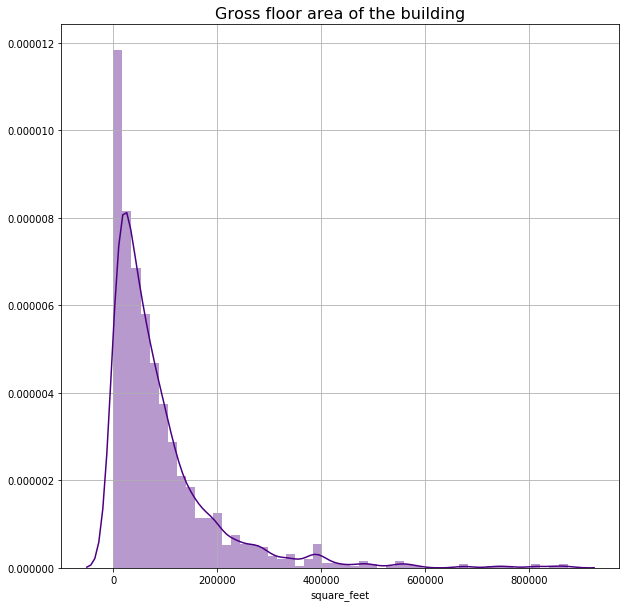

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(meta_data['square_feet'], color='indigo', 
             ax=ax).set_title('Gross floor area of the building', fontsize=16)
plt.grid()
plt.show()

Above is the distribution of  square metres of the buildings

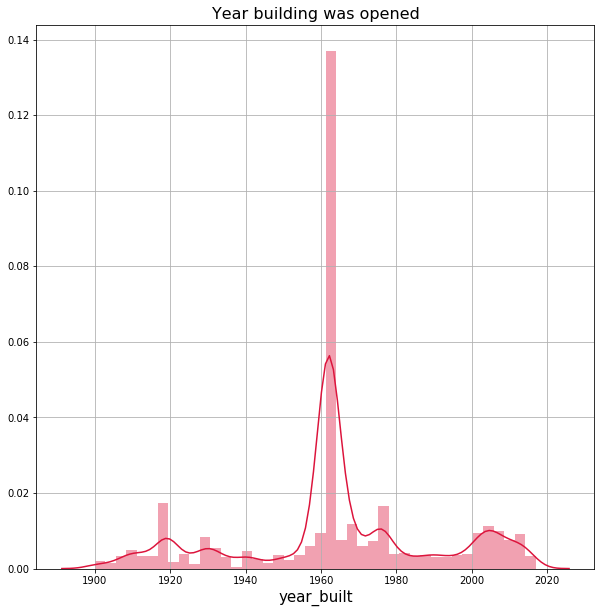

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(meta_data['year_built'], color='crimson', 
             ax=ax).set_title('Year building was opened', fontsize=16)
plt.xlabel('year_built', fontsize=15)
plt.grid()
plt.show()

Most the buildings were opened around 1965

Least number of building was opened in 1939

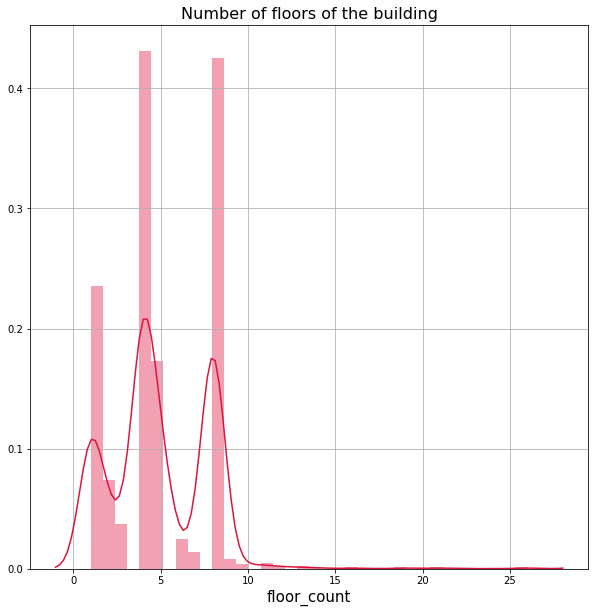

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.distplot(meta_data['floor_count'].dropna(), color='crimson', 
             ax=ax).set_title('Number of floors of the building', fontsize=16)
plt.xlabel('floor_count', fontsize=15)
plt.grid()
plt.show()

Most of the buiidings had around 4 floors and few from 10 and above 

One thing I'm not a fan of is that the weather data is provided. It's clear that weather is strongly correlated with energy consumption, but we can't predict exactly what the future weather will be- so why would we incorporate it into our models if we are trying to predict the future? I've had a few arguments with consultants about this exact fact- weather data is only valuable if you believe the weather forecast is strong enough to improve your model. This means you need to train your models on the forecast not the actualized weather data. At least in real life that's the way it works 😄 .

One thing that will become very apparent as you look at the data is how energy consumption is strongly correlated with the time of year, day of week, and hour within the day. At least for electricty this is because much of the power feeds air conditioning units - which are used more in the summer months, and can be shut off during weekends and at nights.

# training of the data

merging the all data


In [51]:
meta_data.head(2)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,primary_usage
0,0,0,Education,7432,2008.0,5.0,0.0
1,0,1,Education,2720,2004.0,5.0,0.0


In [52]:
#dropping  the primary use of the buildings
meta_data.drop('primary_use',axis=1,inplace=True)

In [53]:
meta_data.head(2)

,site_id,building_id,square_feet,year_built,floor_count,primary_usage
0,0,0,7432,2008.0,5.0,0.0
1,0,1,2720,2004.0,5.0,0.0


In [54]:
info_build.head(2)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,5.0
1,0,1,Education,2720,2004.0,5.0


In [55]:
info_build.drop('primary_use',axis=1,inplace=True)

In [56]:
#checking if the data has been dropped
info_build.head(2)

,site_id,building_id,square_feet,year_built,floor_count
0,0,0,7432,2008.0,5.0
1,0,1,2720,2004.0,5.0


In [57]:
df_weather.head(2)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,2.0,21.1,-1.0,1020.2,70.0,1.5


In [64]:
df.head(2)

,building_id,meter,meter_reading,Timestamp
0,0,0,0.0,2016-01-01
1,1,0,0.0,2016-01-01


In [ ]:
complete=pd.concat([meta_data,info_build,df_weather,df],axis=1)
complete.head(2)

TO BE CONTINUED By creating a model and testing it

Analysis done by 
 
 
 ## kristine karimi : Data scientist || Ml expert
